# Compare 2017 and 2020 Mangrove Density in Mozambique 

#### Use Sentinel Hub NDVI (normalized difference vegetation index) imagery to evaluate vegetation gain/loss in a mangrove environment. Load geospatial packages from your geo environment. This example focuses on the mangroves in Mozambique. Make a Sentinel Hub account on  https://www.sentinel-hub.com/ . Authenticate Sentinel Hub credentials as below.

In [ ]:
from sentinelhub import SHConfig


INSTANCE_ID = ''  # In case you put instance ID into configuration file you can leave this unchanged

if INSTANCE_ID:
    config = SHConfig()
    config.instance_id = INSTANCE_ID
else:
    config = None
    
import datetime
import numpy as np

import matplotlib.pyplot as plt

from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox

#### Define a plotting function for retrieved imagery and make a bounding box for the study location. 

In [14]:
def plot_image(image, factor=1, colmap='viridis'):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1), cmap=colmap)
    else:
        plt.imshow(image , cmap=colmap)
        

In [15]:
mangrove_coords= [-20.920979, 35.102015] # SoutheasEast Africa

bbox =  [mangrove_coords[1]-0.02, 
         mangrove_coords[0]-0.02, 
         mangrove_coords[1]+0.02,
         mangrove_coords[0]+0.02]

mangrove_bbox = BBox(bbox=bbox, crs=CRS.WGS84)

#### Find a cloudless image from the dry season as early as possible in the record (2017), and again for 2020. Specify layer='NDVI' in the query.

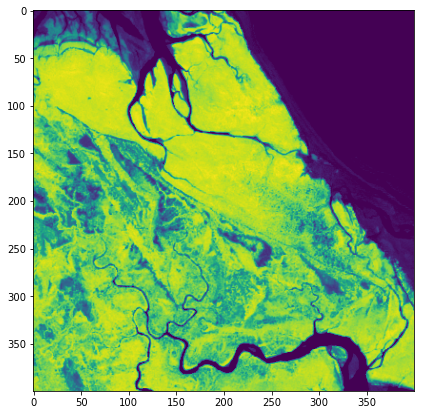

In [16]:
wms_true_color_request = WmsRequest(
    #layer='TRUE-COLOR-S2-L1C',
    layer='NDVI',
    bbox=mangrove_bbox,
    time='2017-05-16',
    width=400,
    height=400,
    config=config
)

wms_true_color_img = wms_true_color_request.get_data()
ndvi2017=wms_true_color_img[-1]
plot_image(wms_true_color_img[-1], colmap = 'viridis')

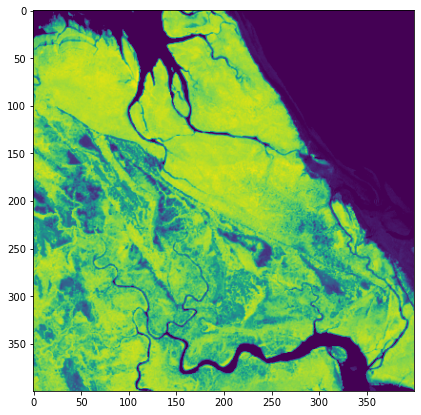

In [17]:
wms_true_color_request = WmsRequest(
    #layer='TRUE-COLOR-S2-L1C',
    layer='NDVI',
    bbox= mangrove_bbox,
    time='2020-05-15',
    width=400,
    height=400,
    config=config
)

wms_true_color_img = wms_true_color_request.get_data()
ndvi2020=wms_true_color_img[-1]
#Single element in the list is of type <class 'numpy.ndarray'> and has shape (856, 512, 3)
plot_image(wms_true_color_img[-1])

#### The two NDVI images show a slight dimming from 2017 to 2020. Now subtract 2017 from 2020 pixel values to make a map of NDVI dimming as a proxy for mangrove density loss in Mozambique. Red patches show the areas with mangrove density loss over a 3 year period. However, this does not account for storms and weather impacts.

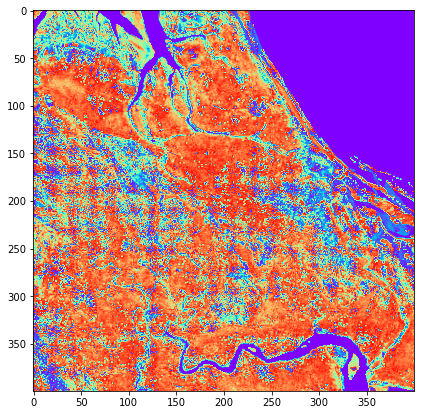

In [18]:
ndviloss = np.subtract(ndvi2020, ndvi2017)
flatten = lambda l: [item for sublist in l for item in sublist]
flatten(ndviloss)
ndviloss = np.reshape(flatten(ndviloss), (400, 400))
plot_image(ndviloss*5, colmap = 'rainbow') # multiply by 5 to get the right amount of contrast